In [18]:
import pandas as pd   #Library Immports
import matplotlib.pyplot as plt
import scipy.stats
import matplotlib
filepath_hospital = "C:/Users/Owner/Documents/mdst_workshops/Workshop3/HospitalAdmissionsData.csv"

hospital = pd.read_csv(filepath_hospital) #Dataframe

In [2]:
hospital.columns #Headers 1

Index(['ID', 'AdmissionLengthDays', 'Death_1', 'Admission_Type',
       'Insurance_Type', 'EnglishLanguage_1', 'Religion_Type', 'Married_1',
       'Race', 'Dx'],
      dtype='object')

In [3]:
hospital.head() #1)

,ID,AdmissionLengthDays,Death_1,Admission_Type,Insurance_Type,EnglishLanguage_1,Religion_Type,Married_1,Race,Dx
0,42862,4.277778,0,elective,private,1,episcopalian,1,white,mitral stenosis\mitral valve replacement /sda
1,5967,26.122917,0,elective,private,0,catholic,1,white,duodenal mass/sda
2,50952,7.028472,1,emergency,medicare,1,catholic,0,asian - japanese,? serotonin syndrome
3,17138,34.187500,0,elective,medicare,1,catholic,1,white,abdominal aortic aneurysm/sda
4,27703,6.165972,0,elective,government,0,protestant quaker,0,black/african american,absence/sda


In [4]:
hospital.info() #There is one float feature and 4 integer features


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58863 entries, 0 to 58862
Data columns (total 10 columns):
ID                     58863 non-null int64
AdmissionLengthDays    58863 non-null float64
Death_1                58863 non-null int64
Admission_Type         58863 non-null object
Insurance_Type         58863 non-null object
EnglishLanguage_1      58863 non-null int64
Religion_Type          58408 non-null object
Married_1              58863 non-null int64
Race                   58863 non-null object
Dx                     58863 non-null object
dtypes: float64(1), int64(4), object(5)
memory usage: 4.5+ MB


In [5]:
hospital.describe(include='object')
# The objects are Admisssion_Type, Insurance_Type, Religion_Type, Race, and Dx

,Admission_Type,Insurance_Type,Religion_Type,Race,Dx
count,58863,58863,58408,58863,58863
unique,4,5,20,41,15647
top,emergency,medicare,catholic,white,newborn
freq,41987,28157,20561,40927,7823


In [6]:
hospital.Insurance_Type.unique()
# Possible values for insurance type

array(['private', 'medicare', 'government', 'medicaid', 'self pay'],
      dtype=object)

In [7]:
#Summary Statistics for Admission Length
hospital.AdmissionLengthDays.describe()



count    58863.000000
mean        10.138978
std         12.465611
min         -0.945139
25%          3.743056
50%          6.465972
75%         11.798264
max        294.660417
Name: AdmissionLengthDays, dtype: float64

In [8]:
hospital.AdmissionLengthDays.isna #No values missing #

<bound method Series.isna of 0         4.277778
1        26.122917
2         7.028472
3        34.187500
4         6.165972
           ...    
58858    12.177083
58859    10.613889
58860     1.095139
58861     2.925000
58862     2.851389
Name: AdmissionLengthDays, Length: 58863, dtype: float64>

In [9]:
hospital.AdmissionLengthDays.unique #Pretty useless unique stuff

<bound method Series.unique of 0         4.277778
1        26.122917
2         7.028472
3        34.187500
4         6.165972
           ...    
58858    12.177083
58859    10.613889
58860     1.095139
58861     2.925000
58862     2.851389
Name: AdmissionLengthDays, Length: 58863, dtype: float64>

In [10]:
hospital.AdmissionLengthDays.sum() #Total number of days

596810.647222342

In [11]:
hospital.AdmissionLengthDays.mean() #Average number of days


10.138977748710507

In [12]:
hospital.AdmissionLengthDays.std() #Standard deviation of admission length

12.46561099318262

In [13]:
hospital.describe(include='object')
#Most common for each asked for in third row (top)

,Admission_Type,Insurance_Type,Religion_Type,Race,Dx
count,58863,58863,58408,58863,58863
unique,4,5,20,41,15647
top,emergency,medicare,catholic,white,newborn
freq,41987,28157,20561,40927,7823


Text(0, 0.5, 'Count')

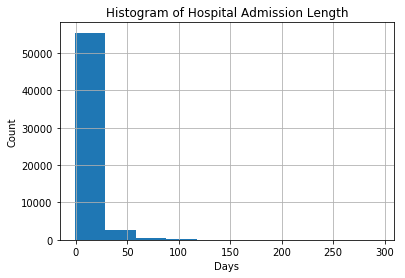

In [14]:
#Show a histogram for admission days 
#(with appropriate labels, titles, etc),
#and also show a histogram for admission days on a log scale. Describe what you see
hospital.hist(column = 'AdmissionLengthDays', label = True)
plt.title('Histogram of Hospital Admission Length')
plt.xlabel('Days')
plt.ylabel('Count')


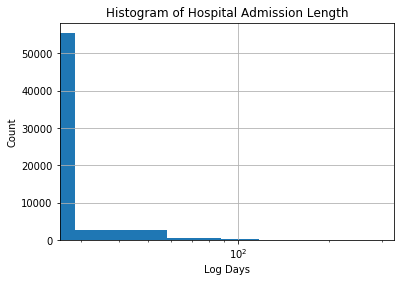

In [19]:
hospital.hist(column = 'AdmissionLengthDays', label = True)
plt.title('Histogram of Hospital Admission Length')
plt.xlabel('Log Days')
plt.ylabel('Count')

plt.xscale('Log')
#This shows most people have short stays

Text(0.5, 0.04, 'Admission Length')

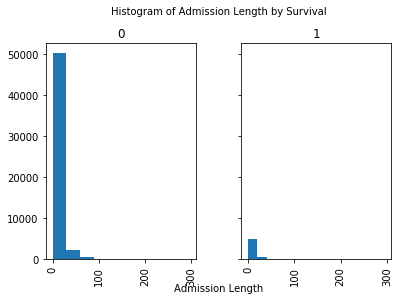

In [16]:
#Compare the average length of admission between those who died
#versus those who did not die. Show a visualization, with 
#appropriate labels, titles, etc.

fig, axes = plt.subplots(1,2, sharex=True, sharey = True)

hospital.hist(column='AdmissionLengthDays', by=hospital.Death_1, ax=axes)

fig.text(.5, 1, 'Histogram of Admission Length by Survival', ha='center')
fig.text(.5, 0.04, 'Admission Length', ha='center')
#This shows that most people who survived in the hospital were not in for long, 
# and that most people admitted don't die. 

In [17]:
#Describe the association between death and insurance type and show 
# a visualization or test.

from scipy import stats
chi_need = pd.crosstab(hospital.Death_1, hospital.Insurance_Type)
chi = stats.chi2_contingency(chi_need)
print(chi)

#With a p-value to the -213 power, it's safe to say that the null hypothesis
# of no association has been rejected. 


(990.8535593949656, 3.425615316200906e-213, 4, array([[ 1603.93780473,  5206.26864074, 25357.70733738, 20293.73076466,
          549.35545249],
       [  177.06219527,   574.73135926,  2799.29266262,  2240.26923534,
           60.64454751]]))
